<a href="https://colab.research.google.com/github/steven-mpawulo/KWS_NLP_DeepLearning/blob/main/KWS_NLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 
from glob import glob
import librosa
from IPython.display import Audio
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
fn = []
label = []
for dir_name, _, filenames in os.walk('/content/drive/MyDrive/more_audio_files/latest_keywords'):
  for filename in filenames:
    # print(fn)
    # print(dir_name)
    mylabel = dir_name.split('/')[-1]
    label.append(mylabel.lower())
    myfn = '/content/drive/MyDrive/more_audio_files/'+'latest_keywords/'+mylabel+'/'+filename
    fn.append(myfn)
print('Datset is loaded')

Datset is loaded


In [3]:
df1 = pd.DataFrame({'fn': fn, 'label': label})

In [4]:
newfn = []
newlabel = []
for dir_name, _, filenames in os.walk('/content/drive/MyDrive/nlp_keywords/nlp_keywords'):
  for filename in filenames:
    # print(fn)
    # print(dir_name)
    mylabel = dir_name.split('/')[-1]
    newlabel.append(mylabel.lower())
    myfn = '/content/drive/MyDrive/'+'nlp_keywords/'+'nlp_keywords/'+mylabel+'/'+filename
    newfn.append(myfn)
print('Datset is loaded')

Datset is loaded


In [5]:
df2 = pd.DataFrame({'fn': newfn, 'label': newlabel})
df2 = df2.drop(0, axis=0)

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/KWS Dataset/Train.csv')


In [7]:
df4 = df3.copy()

In [8]:
df4['fn'] = df4['fn'].apply(lambda x: '/content/drive/MyDrive/audio_files/'+x)

In [9]:
df4

,fn,label
0,/content/drive/MyDrive/audio_files/audio_files...,akawuka
1,/content/drive/MyDrive/audio_files/audio_files...,banana
2,/content/drive/MyDrive/audio_files/audio_files...,obulwadde
3,/content/drive/MyDrive/audio_files/audio_files...,nnyaanya
4,/content/drive/MyDrive/audio_files/audio_files...,pampu
...,...,...
1104,/content/drive/MyDrive/audio_files/audio_files...,cassava
1105,/content/drive/MyDrive/audio_files/audio_files...,harvesting
1106,/content/drive/MyDrive/audio_files/audio_files...,farm
1107,/content/drive/MyDrive/audio_files/audio_files...,nakavundira


In [10]:
train = pd.concat([df4,df2,df1])

In [11]:
train

,fn,label
0,/content/drive/MyDrive/audio_files/audio_files...,akawuka
1,/content/drive/MyDrive/audio_files/audio_files...,banana
2,/content/drive/MyDrive/audio_files/audio_files...,obulwadde
3,/content/drive/MyDrive/audio_files/audio_files...,nnyaanya
4,/content/drive/MyDrive/audio_files/audio_files...,pampu
...,...,...
1735,/content/drive/MyDrive/more_audio_files/latest...,enva endiirwa
1736,/content/drive/MyDrive/more_audio_files/latest...,enva endiirwa
1737,/content/drive/MyDrive/more_audio_files/latest...,enva endiirwa
1738,/content/drive/MyDrive/more_audio_files/latest...,enva endiirwa


In [12]:
train1 = train.copy()

In [13]:
train1 = train1.sample(frac=1).reset_index(drop=True)

In [14]:
train1

,fn,label
0,/content/drive/MyDrive/more_audio_files/latest...,eppapaali
1,/content/drive/MyDrive/more_audio_files/latest...,bibala
2,/content/drive/MyDrive/nlp_keywords/nlp_keywor...,ekirwadde
3,/content/drive/MyDrive/nlp_keywords/nlp_keywor...,nnyaanya
4,/content/drive/MyDrive/nlp_keywords/nlp_keywor...,munyeera
...,...,...
4704,/content/drive/MyDrive/more_audio_files/latest...,ebiwuka
4705,/content/drive/MyDrive/audio_files/audio_files...,ekirime
4706,/content/drive/MyDrive/nlp_keywords/nlp_keywor...,ensuku
4707,/content/drive/MyDrive/audio_files/audio_files...,nursery bed


In [15]:
class conf:
    sampling_rate = 44100
    duration = 3 # sec
    hop_length = 200*duration # to make time steps 128
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    padmode = 'constant'
    samples = sampling_rate * duration
def get_default_conf():
    return conf

conf = get_default_conf()

In [16]:
def melspectogram_dB(file_path, cst=3, top_db=80.):
  row_sound, sr = librosa.load(file_path,sr=conf.sampling_rate)
  sound = np.zeros((cst*sr,))
  if row_sound.shape[0] < cst*sr:
    sound[:row_sound.shape[0]] = row_sound[:]
  else:
    sound[:] = row_sound[:cst*sr]

  spec = librosa.feature.melspectrogram(sound, 
                                    sr=conf.sampling_rate,
                                    n_mels=conf.n_mels,
                                    hop_length=conf.hop_length,
                                    n_fft=conf.n_fft,
                                    fmin=conf.fmin,
                                    fmax=conf.fmax)
  spec_db = librosa.power_to_db(spec)
  spec_db = spec_db.astype(np.float32)

  return spec_db

def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_img = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  
  return spec_img.astype(np.uint8)
def preprocess_audio(audio_path):
  spec = melspectogram_dB(audio_path)
  spec = spec_to_image(spec)
  return spec

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(128, 221)


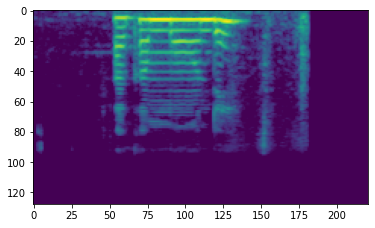

In [17]:
spec = preprocess_audio('/content/drive/MyDrive/nlp_keywords/nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_0839dedd71754b1a8cb558292142fe9d.wav')
print(spec.shape)
plt.imshow(spec)

In [18]:
X = train1['fn'].apply(lambda x: preprocess_audio(x))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

In [19]:
X

0       [[73, 90, 96, 98, 95, 98, 100, 94, 81, 103, 11...
1       [[0, 16, 9, 0, 7, 25, 8, 0, 0, 0, 7, 29, 29, 0...
2       [[98, 101, 89, 58, 34, 37, 43, 53, 48, 51, 48,...
3       [[69, 79, 76, 62, 55, 60, 47, 29, 7, 22, 52, 7...
4       [[59, 47, 19, 36, 30, 37, 90, 90, 91, 106, 97,...
                              ...                        
4704    [[38, 46, 38, 19, 24, 24, 33, 38, 21, 30, 17, ...
4705    [[86, 95, 92, 91, 81, 93, 109, 119, 124, 127, ...
4706    [[98, 95, 72, 63, 67, 50, 33, 35, 58, 67, 68, ...
4707    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4708    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: fn, Length: 4709, dtype: object

In [20]:
X1 = X.copy()

In [21]:
a = X1[0].reshape(128, 221, 1)

In [22]:
a.shape

(128, 221, 1)

In [23]:
X1 = [x.reshape(128, 221, 1) for x in X1]


In [24]:
X2 = X1.copy()

In [25]:
b = tf.convert_to_tensor(X2[0],dtype='float32')

In [26]:
X2 = [tf.convert_to_tensor(x, dtype='float32') for x in X2]

In [27]:
X2 = np.array(X2)

In [28]:
X2.shape

(4709, 128, 221, 1)

In [29]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


In [30]:
y = enc.fit_transform(train1[['label']])

In [31]:
y = y.toarray()

In [32]:
y.shape

(4709, 193)

In [33]:
from keras import models
from keras import layers

In [54]:
model = models.Sequential(
    [
        layers.Input(shape=(128, 221, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(193, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 219, 32)      320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 63, 109, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 107, 64)       18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 30, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 51, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 25, 128)     

In [55]:
batch_size = 64
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X2, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 5s 81ms/step - loss: 5.4184 - accuracy: 0.0106 - val_loss: 5.0644 - val_accuracy: 0.0117
Epoch 2/30
59/59 [==============================] - 4s 76ms/step - loss: 5.0011 - accuracy: 0.0154 - val_loss: 5.0212 - val_accuracy: 0.0138
Epoch 3/30
59/59 [==============================] - 4s 76ms/step - loss: 4.8339 - accuracy: 0.0382 - val_loss: 4.8487 - val_accuracy: 0.0361
Epoch 4/30
59/59 [==============================] - 5s 78ms/step - loss: 4.3420 - accuracy: 0.0980 - val_loss: 4.3397 - val_accuracy: 0.1040
Epoch 5/30
59/59 [==============================] - 5s 77ms/step - loss: 3.6352 - accuracy: 0.1834 - val_loss: 3.9941 - val_accuracy: 0.1486
Epoch 6/30
59/59 [==============================] - 4s 76ms/step - loss: 2.9330 - accuracy: 0.2989 - val_loss: 3.7445 - val_accuracy: 0.2166
Epoch 7/30
59/59 [==============================] - 4s 75ms/step - loss: 2.2317 - accuracy: 0.4486 - val_loss: 3.5639 - val_accuracy: 0.2813
Epoch 8/30
59

Text(0, 0.5, 'training loss')

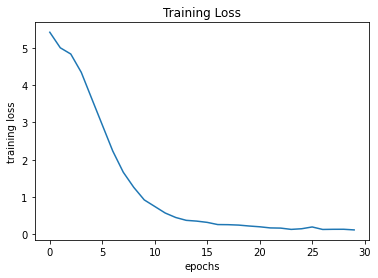

In [67]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('training loss')


Text(0, 0.5, 'training accuracy')

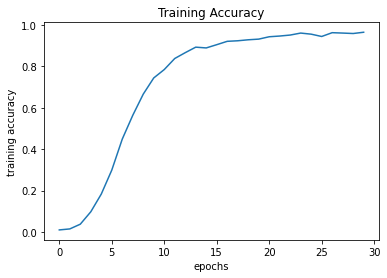

In [66]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('training accuracy')

Text(0, 0.5, 'validation loss')

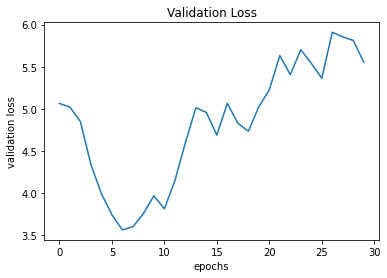

In [63]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('epochs')
plt.ylabel('validation loss')

Text(0, 0.5, 'validation accuracy')

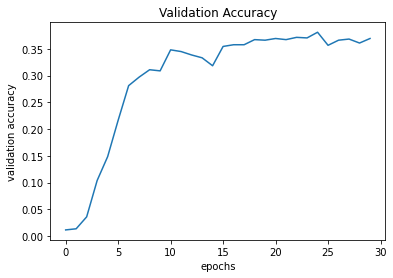

In [65]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')